Sample 1 Mean: 47.75
Sample 2 Mean: 55.21
t-Statistic: -3.76
Degrees of Freedom: 96.70
p-Value: 0.0003
Confidence Interval of Mean Difference: [-11.41, -3.53]


Reject the null hypothesis. The means of the two samples are significantly different.


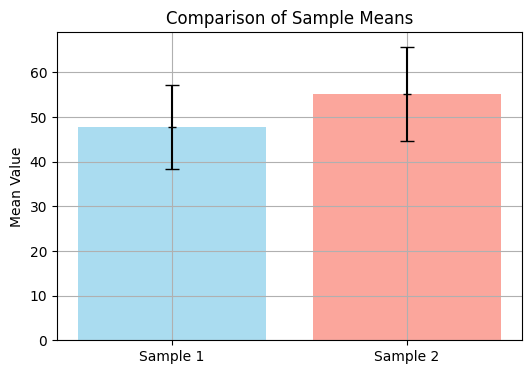

In [5]:
#Generate two sets of from a normal distribution and perform a two-sample t-test. Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation. Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation. Use and determine whether the means differ significantly.

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


np.random.seed(42)

# Generate two sets of random values from normal distributions
mu1, sigma1 = 50, 10
mu2, sigma2 = 55, 12

sample1 = np.random.normal(mu1, sigma1, 50)
sample2 = np.random.normal(mu2, sigma2, 50)

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

# Compute mean difference and confidence interval
mean_diff = np.mean(sample1) - np.mean(sample2)
std_err = np.sqrt(np.var(sample1, ddof=1)/len(sample1) + np.var(sample2, ddof=1)/len(sample2))
df = (std_err**4) / ((np.var(sample1, ddof=1)/len(sample1))**2 / (len(sample1)-1) + (np.var(sample2, ddof=1)/len(sample2))**2 / (len(sample2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

# Display results
print(f"Sample 1 Mean: {np.mean(sample1):.2f}")
print(f"Sample 2 Mean: {np.mean(sample2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")
print('\n')

# Significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

# Visualize
plt.figure(figsize=(6, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(sample1), np.mean(sample2)], color=['skyblue', 'salmon'], alpha=0.7)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(sample1), np.mean(sample2)], yerr=[np.std(sample1, ddof=1), np.std(sample2, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()
